#### USA Houseprices - Dataset 1 - Excercise 1 - Timothy Gregorian

In this analysis, we explore a dataset of housing prices in the United States to understand the key factors that influence property values. The main goal is to build a predictive model using a deep learning neural network, which can accurately estimate house prices based on their characteristics.

In addition, we will analyze the correlations between the variables, since there is a possibility that the dataset may not be suitable for achieving a high R-squared score when evaluating the quality of the model.

#### Use of AI 
I used AI to generate ideas on how to improve the error metrics (e.g., R², MSE, MAE, RMSE). The AI supported me in identifying possible causes for poor performance (such as dataset quality, feature encoding, scaling, or model architecture) and suggested alternative strategies.

### Link to Dataset 1
https://www.kaggle.com/datasets/arnavgupta1205/usa-housing-dataset

### Information about the Dataset
This USA Housing Market Dataset contains 300 rows and 10 columns of real-estate related data, which can be used for housing price predictions.

### Data Description
The dataset consists of 10 variables related  to housing characteristics in the United States:

1) Price: The selling price of the house (target variable).

2) Bedrooms: Number of bedrooms in the house.

3) Bathrooms: Number of bathrooms in the house.

4) SquareFeet: Total living area in square feet.

5) YearBuilt: The year the property was constructed.

6) GarageSpaces: Number of garage spaces available.

7) LotSize: Size of the property lot.

8) ZipCode: Postal code indicating the geographical location of the    house (categorical variable).

9) CrimeRate: Crime index of the neighborhood where the house is located (0.0 - 100.0).

10) SchoolRating: Quality rating of nearby schools, ranging from 1 (lowest) to 10 (highest).

#### Import all necessary libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

#### Load the Dataset

In [12]:
df = pd.read_csv("usa_housing_kaggle.csv")
df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,221958,1,1.9,4827,1979,2,1.45,82240,48.60,5
1,771155,2,2.0,1035,1987,2,1.75,74315,92.03,9
2,231932,1,3.0,2769,1982,1,1.46,79249,52.08,3
3,465838,3,3.3,2708,1907,3,1.62,80587,61.65,1
4,359178,4,3.4,1175,1994,2,0.74,20756,15.66,4


#### Information about the Dataset

In [13]:
print(df.shape)
print("\n")
print(df.info())
print("\n")
print(df.describe())

(300, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         300 non-null    int64  
 1   Bedrooms      300 non-null    int64  
 2   Bathrooms     300 non-null    float64
 3   SquareFeet    300 non-null    int64  
 4   YearBuilt     300 non-null    int64  
 5   GarageSpaces  300 non-null    int64  
 6   LotSize       300 non-null    float64
 7   ZipCode       300 non-null    int64  
 8   CrimeRate     300 non-null    float64
 9   SchoolRating  300 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 23.6 KB
None


               Price    Bedrooms   Bathrooms  SquareFeet    YearBuilt  \
count     300.000000  300.000000  300.000000   300.00000   300.000000   
mean   522761.916667    2.966667    2.464000  3052.75000  1962.616667   
std    256922.348275    1.451175    0.886184  1194.97144    36.005431   
min    112666.000

#### Check the length of the Dataset

In [14]:
print("Amount of data in the dataset: ")
len(df)

Amount of data in the dataset: 


300

#### Check for any missing values 

In [15]:
df.isna().sum()

Price           0
Bedrooms        0
Bathrooms       0
SquareFeet      0
YearBuilt       0
GarageSpaces    0
LotSize         0
ZipCode         0
CrimeRate       0
SchoolRating    0
dtype: int64

#### Check for any duplicates

In [16]:
print("Duplicates: ")
duplicates = int(df.duplicated().sum())
duplicates

Duplicates: 


0

#### Data Cleaning 
The results showed that the dataset contains 300 observations, with no missing values and no duplicate records.

To make the variable "Zip_Code" useful for our model, it has been split into 4 categories which represent the cardinal directions (North, East, South, West).

The One-Hot-Encoding method was used for the variable "Region_East", "Region_West", "Region_South" and "Region_North", so that the neural model does not see higher numbers of zip codes as a better number.

In [17]:
# Independent Variable List:
# Bedrooms
# Bathrooms
# Squarefeet
# YearBuilt
# GarageSpaces
# LotSize
# ZipCode
# CrimeRate
# SchoolRating

# Dependent Variables:
# Price -> Training the model to predict this variable
# Save every independent variable in X, except for "price"

def zipcode_to_region(zipcode):
    if 10000 <= zipcode < 30000:
        return "East"
    elif 30000 <= zipcode < 50000:
        return "South"
    elif 50000 <= zipcode < 70000:
        return "North"
    else:
        return "West"


df = df.drop(columns=["Region_East", "Region_West", "Region_South", "Region_North"], errors="ignore")

df["Region"] = df["ZipCode"].apply(zipcode_to_region)

df = pd.get_dummies(df, columns=["Region"], drop_first=False)

y = df["Price"]
X = df.drop(["Price", "ZipCode"], axis=1)

#### Correlation

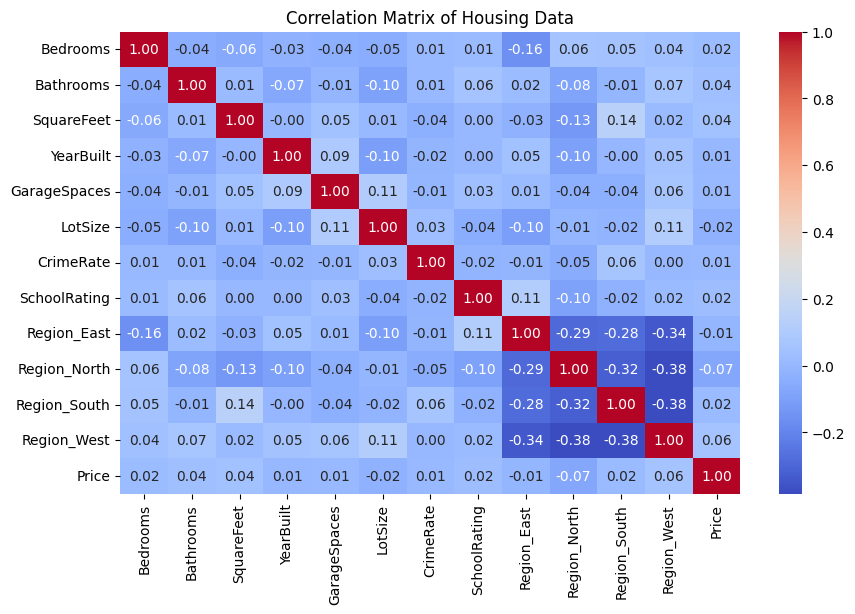

In [18]:
corr = X.join(y).corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Housing Data")
plt.show()

Most variables like bedrooms, bathrooms, size, or year built have only a weak connection to house prices. The regions also don’t explain much, which shows that the dataset does not have strong predictors for price.

#### Fisher Score

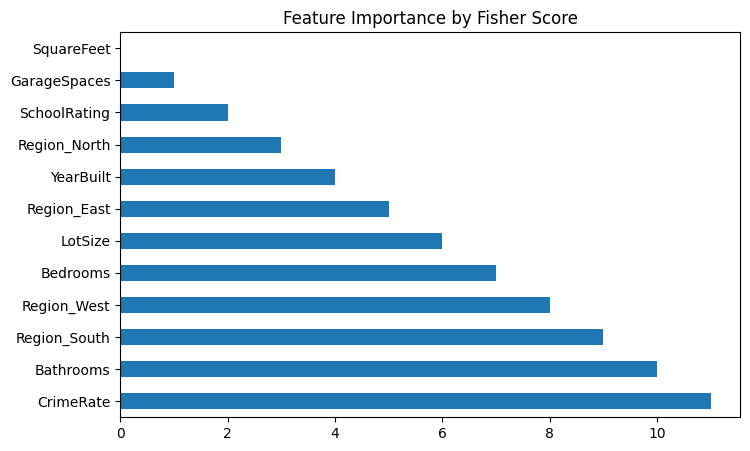

In [19]:
from skfeature.function.similarity_based import fisher_score

y_binned = pd.qcut(y, q=4, labels=False)

ranks = fisher_score.fisher_score(X.values, y_binned.values)
feat_importances = pd.Series(ranks, index=X.columns)

feat_importances.sort_values(ascending=False).plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance by Fisher Score")
plt.show()



The Fisher Score test shows that CrimeRate, Bathrooms, and Regions have the strongest influence on predicting house prices. Variables like SquareFeet, GarageSpaces, and SchoolRating are less important for the model.

#### SelectKBest-Score

In [20]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

X_cat = np.abs(X)  
y_cat = y.astype(int)

chi2_selector = SelectKBest(score_func=chi2, k="all")
chi2_selector.fit(X_cat, y_cat)

chi2_scores = pd.DataFrame({
    "Feature": X_cat.columns,
    "Chi2 Score": chi2_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_scores)


         Feature     Chi2 Score
2     SquareFeet  139860.475391
6      CrimeRate    5039.632897
7   SchoolRating     419.528450
4   GarageSpaces     246.440529
8    Region_East     239.000000
10  Region_South     228.000000
9   Region_North     227.000000
0       Bedrooms     212.247191
11   Region_West     206.000000
3      YearBuilt     197.502102
1      Bathrooms      95.296753
5        LotSize      83.271463


The SelectKBest Chi² test shows that SquareFeet and CrimeRate are the most important features for predicting house prices. Other variables like Bathrooms and LotSize have much lower importance.

#### VIF-Test

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy()

X_vif = X_vif.astype(float)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(vif_data)


         Feature          VIF
0       Bedrooms     1.040308
1      Bathrooms     1.033074
2     SquareFeet     1.039447
3      YearBuilt     1.042271
4   GarageSpaces     1.030404
5        LotSize     1.062858
6      CrimeRate     1.009585
7   SchoolRating     1.023965
8    Region_East   652.689179
9   Region_North   773.774603
10  Region_South   769.372113
11   Region_West  1007.981243


The VIF test shows that most features like Bedrooms, Bathrooms, and SquareFeet have low collinearity and are safe to keep. However, the Region variables have extremely high VIF values, which means they are strongly correlated with each other and could cause problems in the model.

#### X/y -Split

In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Training size: (210, 12)
Validation size: (45, 12)
Test size: (45, 12)


#### Scaling of the Data
The training, validation, and test datasets are scaled with StandardScaler to standardize feature values.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

#### Architecture of the neural network
The neural network is built with multiple dense layers and batch normalization to improve learning stability.

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

variable_amount = len(X.columns)

training_model_11 = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

training_model_11.compile(optimizer="adam", loss="mse")

training_model_11.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,137 (4.44 KB)

 Trainable params: 1,113 (4.35 KB)

 Non-trainable params: 24 (96.00 B)

#### Training of the model
The model is trained with early stopping to prevent overfitting, using validation loss.

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",  
    patience=20,         
    restore_best_weights=True

)

mc = ModelCheckpoint(
    'best_model_small_dataset-regression.keras',
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

callback_list = [early_stop, mc]

history = training_model_11.fit(
    x=X_train,
    y=y_train,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=callback_list,
    verbose=1
)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 320339279872.0000 - val_loss: 388529324032.0000
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 320339181568.0000 - val_loss: 388529127424.0000
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 320338984960.0000 - val_loss: 388528898048.0000
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 320338755584.0000 - val_loss: 388528668672.0000
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 320338526208.0000 - val_loss: 388528373760.0000
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 320338264064.0000 - val_loss: 388528013312.0000
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 320337903616.0000 - val_loss: 388527620096.0000
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 320337477632.0000 - val_loss: 388527063040.0000
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 320336920576.0000 - val_loss: 388526342144.0000
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

#### Visualisation of the results

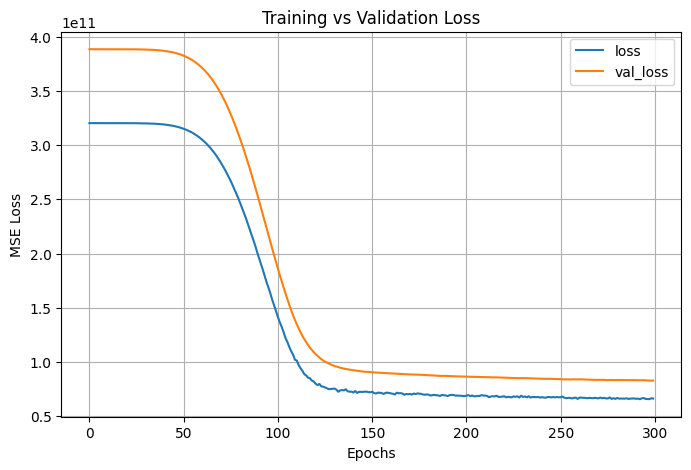

In [26]:
loss_df = pd.DataFrame(training_model_11.history.history)
loss_df.plot(figsize=(8,5))
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


The graph shows that both training and validation loss decrease steadily, meaning the model is learning well. Around 125 epochs, the losses become stable, which suggests the model has reached a good point without overfitting.

#### Reload the best version of the model form history


In [27]:
from keras.models import load_model
best_trained_model = load_model("best_model_small_dataset-regression.keras")

#### Data evaluation

In [28]:
print("Test data evaluation")
print(best_trained_model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(best_trained_model.evaluate(X_train, y_train, verbose=0))

Test data evaluation
65324007424.0

Train data evaluation:
65877098496.0


The evaluation shows that the error for test and train data is very large, meaning the model is not predicting prices accurately. This suggests that either the dataset is very complex pr the dataset is too small to use or the model still needs improvements.

#### Prediction of the data

In [29]:
import seaborn as sns

test_predictions = best_trained_model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))

pred_df = pd.DataFrame(pd.DataFrame(np.asarray(y_test), columns=["Test True Y"]))
pred_df = pd.concat([pred_df, test_predictions], axis = 1)
pred_df.columns = ["Test True Y", "Model Predictions"]

pred_df

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


,Test True Y,Model Predictions
0,517113,466200.25000
1,305041,545661.25000
2,427069,564414.31250
3,227948,515741.43750
4,122671,576627.93750
5,922352,516552.90625
6,979989,441753.65625
7,231932,482404.46875
8,831912,516857.34375
9,659042,496284.46875


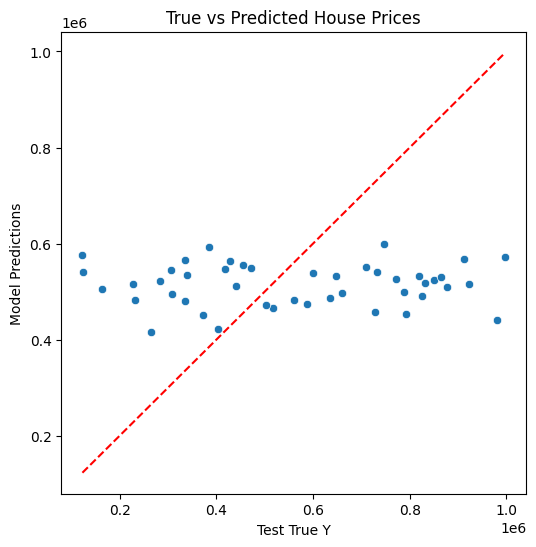

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="Test True Y", y="Model Predictions", data=pred_df)

# Rote gestrichelte Linie (perfekte Vorhersage)
min_val = min(pred_df["Test True Y"].min(), pred_df["Model Predictions"].min())
max_val = max(pred_df["Test True Y"].max(), pred_df["Model Predictions"].max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.title("True vs Predicted House Prices")
plt.xlabel("Test True Y")
plt.ylabel("Model Predictions")
plt.show()


The scatterplot shows that many predicted prices are spread far from the red line. This means the model struggles to match the true house prices accurately.

In [31]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
223187.06 $

MSE
65323999232.0 $^2

RMSE:
255585.6 $

R-squared:
-0.06

Explained variance score:
-0.03


The error metrics show high values and a negative R-squared, which means the model performs poorly and explains the data worse than a simple average. This indicates that the predictions are not reliable yet.

C:\Users\Timothy\AppData\Local\Temp\ipykernel_19024\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


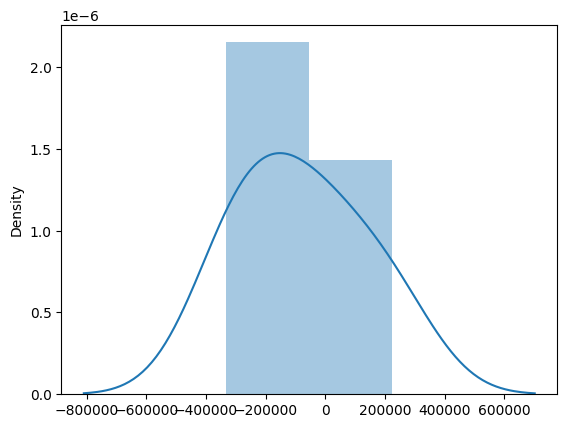

In [32]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

The distplot shows an approximately symmetric distribution of the residuals around 0, indicating that the model’s errors are spread evenly around the prediction axis. However, the values are quite widely dispersed, which suggests a generally low prediction accuracy.

#### Trying the model in practice with new imaginery house

In [33]:
X.columns

Index(['Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt', 'GarageSpaces',
       'LotSize', 'CrimeRate', 'SchoolRating', 'Region_East', 'Region_North',
       'Region_South', 'Region_West'],
      dtype='object')

In [34]:
X.head(3)

,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,CrimeRate,SchoolRating,Region_East,Region_North,Region_South,Region_West
0,1,1.9,4827,1979,2,1.45,48.60,5,False,False,False,True
1,2,2.0,1035,1987,2,1.75,92.03,9,False,False,False,True
2,1,3.0,2769,1982,1,1.46,52.08,3,False,False,False,True


In [60]:
tester_row = {
    "Bedrooms": 4,
    "Bathrooms": 2,
    "SquareFeet": 4227,
    "YearBuilt": 2015,
    "GarageSpaces": 1,
    "LotSize": 1.78,
    "CrimeRate": 42.08,
    "SchoolRating": 8,
    "Region_East": 0,
    "Region_North": 0,
    "Region_South": 1,
    "Region_West": 0
}

tester_row = pd.DataFrame([tester_row])

tester_row_scaled = scaler.transform(tester_row)

result = best_trained_model.predict(tester_row_scaled)[0][0]

print("Estimated house price:")
print(f"${round(float(result), 2)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Estimated house price:
$579338.94


#### Conclusion
The analysis highlights several challenges in predicting house prices with our dataset using a neural network. Most features show only very weak correlations with the target variable (Price). This limits the model’s ability to learn strong predictive patterns. Variables such as SquareFeet, CrimeRate, and Region, at the Fisher Score and Chi²-Test, have higher importance, while others contribute very little. This confirms that not all features are equally useful. The results of the VIF-Test reveal high multicollinearity among the Region variables, meaning that some of them are redundant and may confuse the model. The error metrics (MAE, RMSE, negative R²) show that the trained model currently performs poorly. Predictions on new test data are also far off from the true values.

In the end, the weak performance is less a problem of the neural network architecture itself, but rather of the dataset. The low correlation make accurate prediction difficult. To improve results, a larger and higher-quality dataset with more meaningful features would be necessary.

#### Use of AI for data generation
Since the original dataset was relatively small and might have limited the model’s learning capacity, I used AI to generate 5,000 synthetic but realistic housing data samples. The goal was to test whether the poor performance mainly resulted from the lack of data. By expanding the dataset, we aimed to give the model more diverse examples and improve its ability to generalize.

#### Loading the dataset

In [36]:
df2 = pd.read_csv("usa_housing_realistic.csv")
df2.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,768057,4,1.7,2847,1972,2,1.46,75201,37.28,10
1,712254,5,3.3,2740,1964,1,1.66,30301,39.89,1
2,713762,3,2.4,3163,1966,2,0.99,30301,84.57,3
3,881840,5,2.7,3306,1963,2,1.29,60601,49.06,5
4,881072,5,2.9,3591,1965,1,1.54,30301,53.41,4


In [37]:
print(df2.shape)
print("\n")
print(df2.info())
print("\n")
print(df2.describe())

(5000, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         5000 non-null   int64  
 1   Bedrooms      5000 non-null   int64  
 2   Bathrooms     5000 non-null   float64
 3   SquareFeet    5000 non-null   int64  
 4   YearBuilt     5000 non-null   int64  
 5   GarageSpaces  5000 non-null   int64  
 6   LotSize       5000 non-null   float64
 7   ZipCode       5000 non-null   int64  
 8   CrimeRate     5000 non-null   float64
 9   SchoolRating  5000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 390.8 KB
None


              Price     Bedrooms    Bathrooms   SquareFeet    YearBuilt  \
count  5.000000e+03  5000.000000  5000.000000  5000.000000  5000.000000   
mean   6.907359e+05     3.010800     2.890500  2704.120200  1985.472200   
std    1.835829e+05     1.424601     0.661585   746.768298    21.087384   
min  

In [38]:
print("Amount of data in the dataset: ")
len(df2)

Amount of data in the dataset: 


5000

#### Clean the dataset and handle mising values

In [39]:
df2.isna().sum()

Price           0
Bedrooms        0
Bathrooms       0
SquareFeet      0
YearBuilt       0
GarageSpaces    0
LotSize         0
ZipCode         0
CrimeRate       0
SchoolRating    0
dtype: int64

#### Check if there are any duplicates

In [40]:
print("Duplicates: ")
duplicates = int(df2.duplicated().sum())
duplicates

Duplicates: 


0

In [41]:
def zipcode_to_region(zipcode):
    if 10000 <= zipcode < 30000:
        return "East"
    elif 30000 <= zipcode < 50000:
        return "South"
    elif 50000 <= zipcode < 70000:
        return "North"
    else:
        return "West"

df2 = df2.drop(columns=["Region_East", "Region_West", "Region_South", "Region_North"], errors="ignore")

df2["Region"] = df2["ZipCode"].apply(zipcode_to_region)

df2 = pd.get_dummies(df2, columns=["Region"], drop_first=False)

y = df2["Price"]
X = df2.drop(["Price", "ZipCode"], axis=1)

#### Correlation

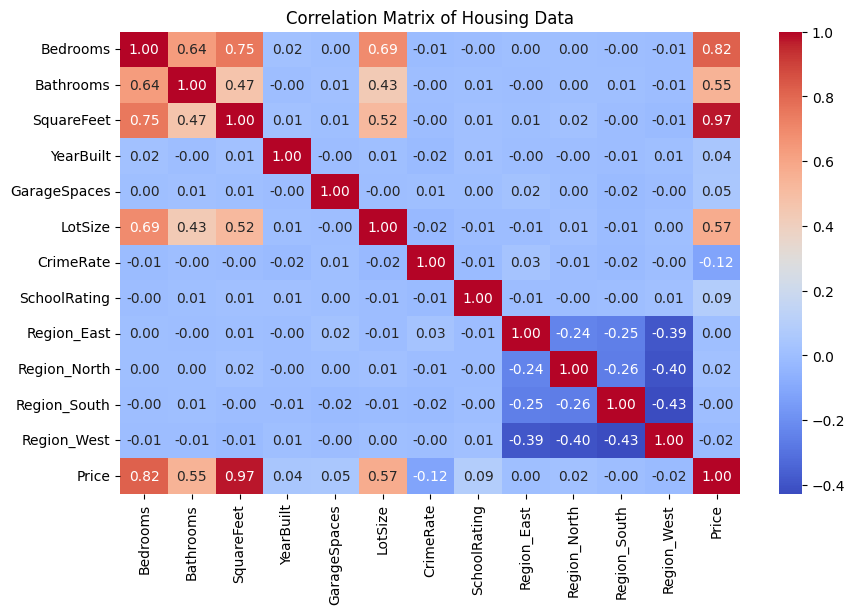

In [42]:
corr = X.join(y).corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Housing Data")
plt.show()

In this new correlation matrix, the key variables like SquareFeet, Bedrooms, and LotSize show a stronger and clearer relationship with Price compared to the earlier results. 

#### Fisher-Score

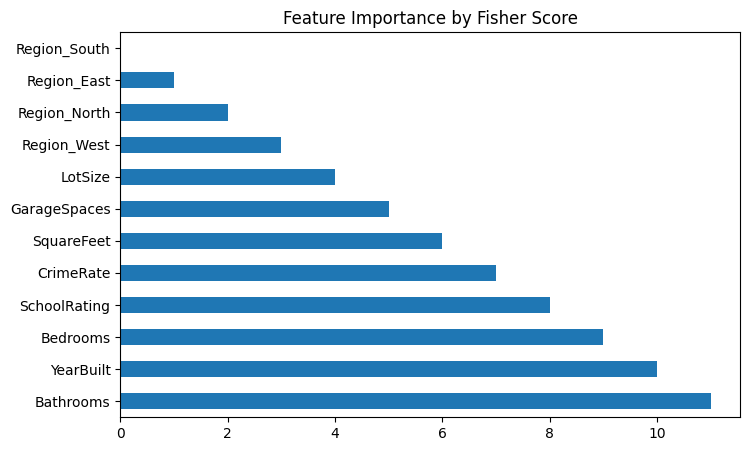

In [43]:
from skfeature.function.similarity_based import fisher_score

y_binned = pd.qcut(y, q=4, labels=False)

ranks = fisher_score.fisher_score(X.values, y_binned.values)
feat_importances = pd.Series(ranks, index=X.columns)

feat_importances.sort_values(ascending=False).plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance by Fisher Score")
plt.show()

In this Fisher Score plot, features like Bathrooms, YearBuilt, and Bedrooms now stand out as the most important, while the region variables have very little influence. Compared to the earlier results, the ranking looks clearer and more realistic.

#### SelectKBest-Score

In [44]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

X_cat = np.abs(X)  
y_cat = y.astype(int)

chi2_selector = SelectKBest(score_func=chi2, k="all")
chi2_selector.fit(X_cat, y_cat)

chi2_scores = pd.DataFrame({
    "Feature": X_cat.columns,
    "Chi2 Score": chi2_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_scores)

         Feature    Chi2 Score
2     SquareFeet  1.030823e+06
6      CrimeRate  3.911576e+04
7   SchoolRating  7.296236e+03
8    Region_East  4.040463e+03
9   Region_North  3.997633e+03
10  Region_South  3.911387e+03
0       Bedrooms  3.365855e+03
11   Region_West  3.007443e+03
4   GarageSpaces  2.167729e+03
3      YearBuilt  1.115821e+03
5        LotSize  7.609664e+02
1      Bathrooms  7.556214e+02


d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  self.y_type_ = type_of_target(y, input_name="y")
d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\sklearn\preprocessing\_label.py:359: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_is_multilabel = type_of_target(y).startswith("multilabel")
d:\5. Semester\Deep Learning\DL-projects\venv312\Li

In this Chi² test, SquareFeet dominates as the most important feature, followed by CrimeRate and SchoolRating, while variables like LotSize and Bathrooms have much lower scores. Compared to the earlier results, the importance is more concentrated on meaningful features. This indicates, that using a larger dataset with good data, could improve the Chi²-Score.

#### VIF-Test

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X.copy()

X_vif = X_vif.astype(float)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(vif_data)

         Feature          VIF
0       Bedrooms     3.930642
1      Bathrooms     1.686300
2     SquareFeet     2.297704
3      YearBuilt     1.001190
4   GarageSpaces     1.000970
5        LotSize     1.903355
6      CrimeRate     1.002097
7   SchoolRating     1.000972
8    Region_East  1697.028720
9   Region_North  1755.826894
10  Region_South  1937.604167
11   Region_West  3549.056924


The VIF results show that most numeric features (like Bedrooms, SquareFeet, LotSize) have low multicollinearity, which is good. However, the Region variables still have extremely high VIF values, meaning they overlap heavily and could cause instability in the model. Compared to before, this confirms that the categorical encoding of regions remains a challenge.

#### X/y -Split

In [46]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Training size: (3500, 12)
Validation size: (750, 12)
Test size: (750, 12)


#### Scaling of the Data

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


#### Create a neural network structure

In [48]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

variable_amount = len(X.columns)

neural_model_12 = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(1)
    ]
)

neural_model_12.compile(optimizer="adam", loss="mse")

neural_model_12.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 409 (1.60 KB)

 Non-trainable params: 24 (96.00 B)

#### Train the neural network

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",  
    patience=20,         
    restore_best_weights=True
)

mc2 = ModelCheckpoint(
    'best_model_small_dataset_extended-regression.keras',
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

callback_list = [early_stop, mc2]

history = neural_model_12.fit(
    x=X_train, y=y_train,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=callback_list,
    verbose=1
)


Epoch 1/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 509267935232.0000 - val_loss: 513182498816.0000
Epoch 2/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 509234905088.0000 - val_loss: 513082327040.0000
Epoch 3/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 508872687616.0000 - val_loss: 512150568960.0000
Epoch 4/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 506587643904.0000 - val_loss: 507478966272.0000
Epoch 5/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 497908285440.0000 - val_loss: 492373966848.0000
Epoch 6/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 474604634112.0000 - val_loss: 457008447488.0000
Epoch 7/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 427000168448.0000 - val_loss: 392099659776.0000
Epoch 8/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 348415885312.0000 - val_loss: 296212004864.0000
Epoch 9/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244755955712.0000 - val_loss: 184233771008.0000
Epoch 10/300
110/11

#### Performance and Error Metrics

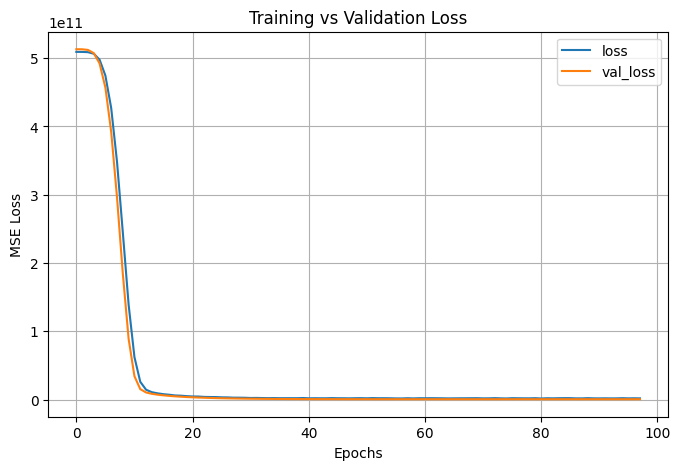

In [50]:
loss_df2 = pd.DataFrame(neural_model_12.history.history)
loss_df2.plot(figsize=(8,5))
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

This graph shows that both training and validation loss quickly dropped within the first few epochs and then stabilized at nearly zero. Compared to the earlier run, the model learned much faster and more consistently, which suggests an improvement in data quality.

#### Reload the best version of the model from history

In [51]:
best_trained_model2 = load_model("best_model_small_dataset_extended-regression.keras")

#### Trying the model and predict the price with new house data

In [52]:
print("Test data evaluation")
print(best_trained_model2.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(best_trained_model2.evaluate(X_train, y_train, verbose=0))

Test data evaluation
383976064.0

Train data evaluation:
392144256.0


This evaluation shows that the error for both training and test data is much lower than before. It suggests the model now generalizes better and performs more consistently on unseen data.

In [53]:
import seaborn as sns

test_predictions2 = best_trained_model2.predict(X_test)
test_predictions2 = pd.Series(test_predictions2.reshape(len(y_test),))

pred_df2 = pd.DataFrame(pd.DataFrame(np.asarray(y_test), columns=["Test True Y"]))
pred_df2 = pd.concat([pred_df2, test_predictions2], axis = 1)
pred_df2.columns = ["Test True Y", "Model Predictions"]

pred_df2

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Test True Y,Model Predictions
0,612860,600611.62500
1,688215,688473.68750
2,509572,549129.31250
3,370773,353310.46875
4,878468,864826.56250
...,...,...
745,613386,588377.81250
746,443678,445060.56250
747,755176,784359.56250
748,404655,422559.09375


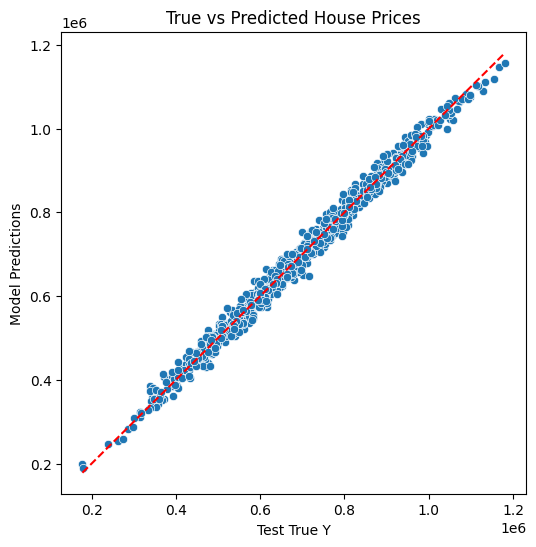

In [54]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="Test True Y", y="Model Predictions", data=pred_df2)

min_val = min(pred_df2["Test True Y"].min(), pred_df2["Model Predictions"].min())
max_val = max(pred_df2["Test True Y"].max(), pred_df2["Model Predictions"].max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.title("True vs Predicted House Prices")
plt.xlabel("Test True Y")
plt.ylabel("Model Predictions")
plt.show()

This scatterplot shows that the predicted house prices align very closely with the true values. The points almost follow the red diagonal line, which means the model is making accurate predictions.

In [55]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions2), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions2), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions2)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions2), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions2), 2))

MAE
15727.98 $

MSE
383976064.0 $^2

RMSE:
19595.31 $

R-squared:
0.99

Explained variance score:
0.99


These evaluation metrics show excellent model performance: the MAE and RMSE are low, while R² and explained variance score are very close to 1. This means the model predicts house prices with very high accuracy.

C:\Users\Timothy\AppData\Local\Temp\ipykernel_19024\1068473982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions2))


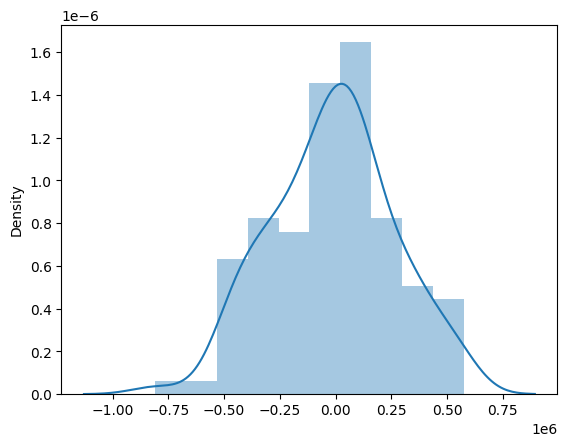

In [56]:
sns.distplot((y_test - test_predictions2))
plt.show()
plt.close()

This residual plot shows that most prediction errors are centered around zero, with a roughly normal distribution. This indicates that the model’s predictions are balanced and do not show major bias.

#### Trying the model in practice with new imaginary house

In [57]:
X.columns

Index(['Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt', 'GarageSpaces',
       'LotSize', 'CrimeRate', 'SchoolRating', 'Region_East', 'Region_North',
       'Region_South', 'Region_West'],
      dtype='object')

In [58]:
X.head(3)

,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,CrimeRate,SchoolRating,Region_East,Region_North,Region_South,Region_West
0,4,1.7,2847,1972,2,1.46,37.28,10,False,False,False,True
1,5,3.3,2740,1964,1,1.66,39.89,1,False,False,True,False
2,3,2.4,3163,1966,2,0.99,84.57,3,False,False,True,False


In [59]:
tester_row2 = {
    "Bedrooms": 3,
    "Bathrooms": 2,
    "SquareFeet": 1550,
    "YearBuilt": 2022,
    "GarageSpaces": 1,
    "LotSize": 1.20,
    "CrimeRate": 7.30,
    "SchoolRating": 9,
    "Region_East": 0,
    "Region_North": 0,
    "Region_South": 0,
    "Region_West": 1
}

tester_row2 = pd.DataFrame([tester_row2])

tester_row_scaled2 = scaler.transform(tester_row2)

result = best_trained_model2.predict(tester_row_scaled2)[0][0]

print("Estimated house price with this example:")
print(f"${round(float(result), 2)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Estimated house price with this example:
$509447.97


#### Conclusion

The results with the synthetic dataset of 5,000 samples generated by AI show a clear improvement in model performance compared to the original small dataset. The correlations in the synthetic data were stronger and more consistent, which gave the model clearer patterns to learn from. As a result, the evaluation metrics improved significantly, with the model achieving a very high R² score of 0.99 and much lower prediction errors.

#### Challenges during the project

At first, I struggled with preprocessing and scaling, especially deciding how to handle categorical variables, but with testing and adjustments I was able to stabilize the training. In working life, methods like this can be highly useful for price prediction, market analysis, and forecasting, as they show how synthetic data can solve problems of limited datasets. This project required experimentation to find the right model setup. For further optimization, I would explore more feature engineering, different regularization techniques, and testing alternative architectures to ensure the model generalizes even better  and predicts more accurrately.